<a href="https://colab.research.google.com/github/AnuragSingla911/PythonStudy/blob/master/data_arg/data_argumentation_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import files

uploaded = files.upload()


Saving 20231015142342_IMG_7413.JPG to 20231015142342_IMG_7413 (1).JPG


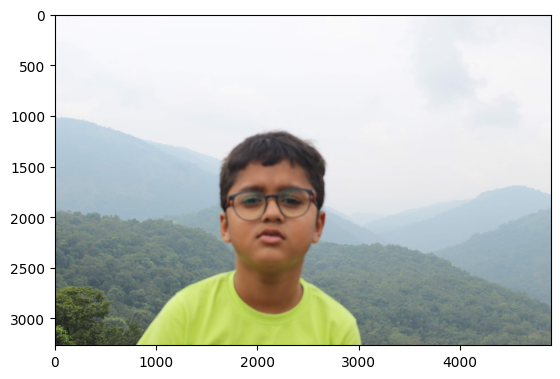

In [3]:
from IPython.display import  Image,display
image_path = '20231015142342_IMG_7413.JPG'


from skimage import io
import matplotlib.pyplot as plt

image = io.imread(image_path)

plt.imshow(image)


In [4]:
def plot_image(images):
    f, axes = plt.subplots(1, len(images))
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image)

Text(0.5, 0.98, 'Different Channels of Image')

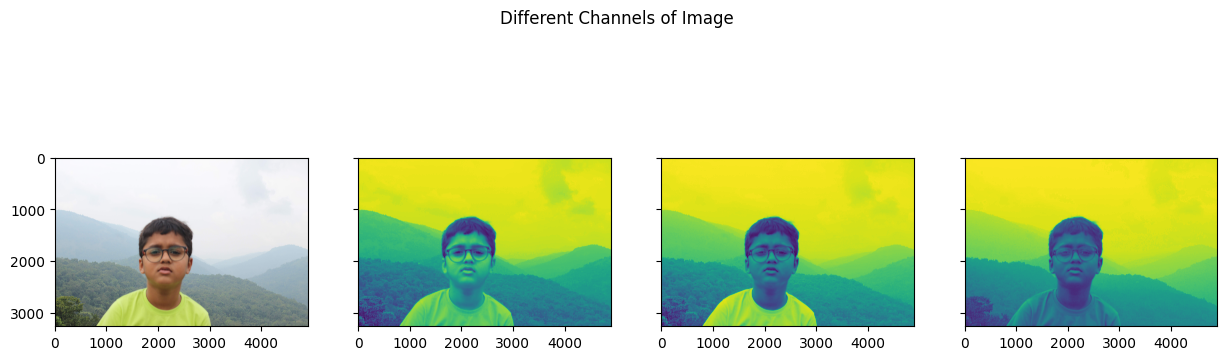

In [5]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
ax1.imshow(image)

# RGB channels
ax2.imshow(image[:, : , 0])
ax3.imshow(image[:, : , 1])
ax4.imshow(image[:, : , 2])
f.suptitle('Different Channels of Image')

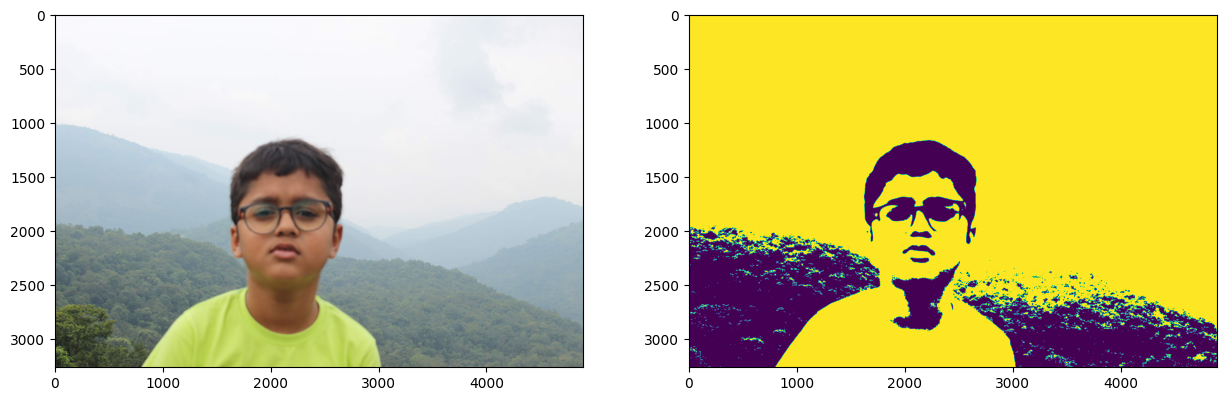

In [7]:
bin_image = image[:, :, 0] > 125
plot_image([image, bin_image])

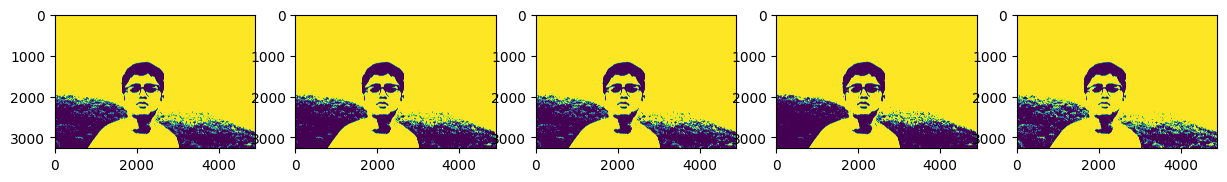

In [9]:
from skimage.morphology import binary_closing, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import disk

# use a disk of radius 3
selem = disk(3)

# oprning and closing
open_img = binary_opening(bin_image, selem)
close_img = binary_closing(bin_image, selem)

# erosion and dilation
eroded_img = binary_erosion(bin_image, selem)
dilated_img = binary_dilation(bin_image, selem)

plot_image([bin_image, open_img, close_img, eroded_img, dilated_img])

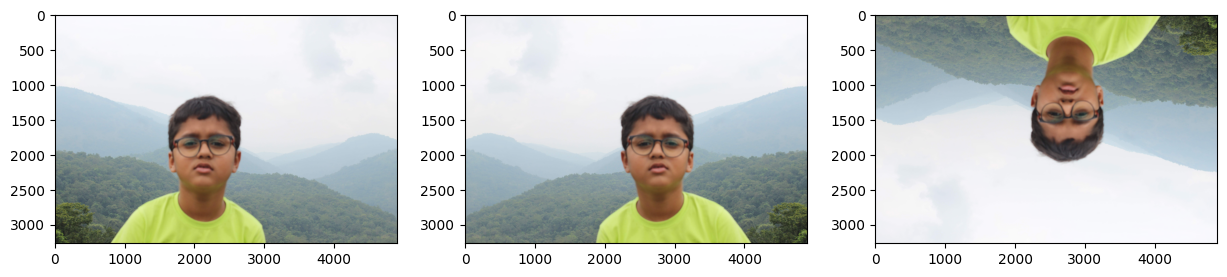

In [10]:
import numpy as np
from skimage import transform

# flip left-right, up-down
image_flipr = np.fliplr(image)
image_flipud = np.flipud(image_flipr)

plot_image([image, image_flipr, image_flipud])

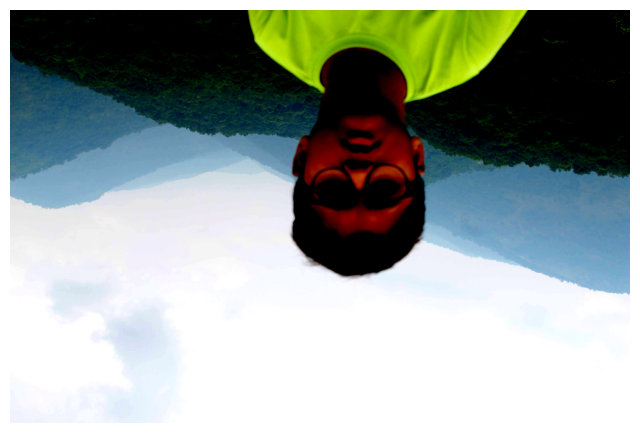

In [13]:
p25 = np.percentile(image_flipud, 25)
p75 = np.percentile(image_flipud, 75)

# Normalize the image using the 25th and 75th percentiles
image_normalized = (image_flipud - p25) / (p75 - p25)

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.imshow(image_normalized, cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.show()

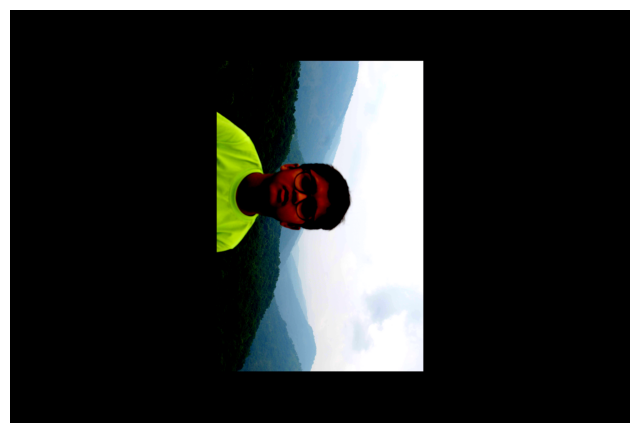

In [26]:
from skimage import transform
shift_x, shift_y = image.shape[1]/2, image.shape[0]/2

# translation by certain units
matrix_to_topleft = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
matrix_to_center = transform.SimilarityTransform(translation=[shift_x, shift_y])

# rotation
rot_transforms =  transform.AffineTransform(rotation=np.deg2rad(90))
scale_transforms = transform.AffineTransform(scale=(2, 2))



rot_image = transform.warp(image_normalized, matrix_to_topleft + rot_transforms + scale_transforms + matrix_to_center)


plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.imshow(rot_image)  # Assuming grayscale image
plt.axis('off')
plt.show()
